# Tarea - Ajuste de curvas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

x = año - 2014

Polinomio de grado 1:


<IPython.core.display.Math object>

Polinomio de grado 2:


<IPython.core.display.Math object>

Polinomio de grado 2:


<IPython.core.display.Math object>

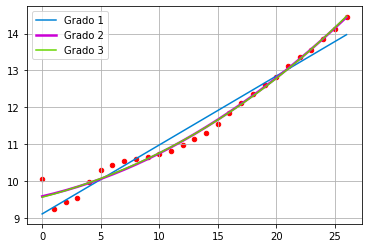

In [52]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as pt
import scipy.optimize as op
from IPython.display import display, Math

def difference(beta, X, y, n):
    beta = np.reshape(beta, [n, -1])
    y_pred = X @ beta
    return ((y - y_pred).T @ (y - y_pred))[0][0]

data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

x = np.linspace(0, 26, 27)
x2 = x**2
x3 = x**3

betai1 = np.random.rand(2)
betai2 = np.random.rand(3)
betai3 = np.random.rand(4)

x = np.reshape(x, [len(x), -1])
x2 = np.reshape(x2, [len(x2), -1])
x3 = np.reshape(x3, [len(x3), -1])

X = np.hstack((np.ones([len(x), 1]), x))
X2 = np.hstack((np.ones([len(x2), 1]), x, x2))
X3 = np.hstack((np.ones([len(x3), 1]), x, x2, x3))

y = np.reshape(data, [len(data), -1])

sol = op.minimize(difference, betai1, args=(X, y, 2))
sol2 = op.minimize(difference, betai2, args=(X2, y, 3))
sol3 = op.minimize(difference, betai3, args=(X3, y, 4))

print("x = año - 2014")
print("")
print("Polinomio de grado 1:")
display(Math(sp.latex(round(sol.get("x")[0], 2))+"+"+sp.latex(round(sol.get("x")[1], 2))+"x"))
print("Polinomio de grado 2:")
display(Math(sp.latex(round(sol2.get("x")[0], 2))+"+"+sp.latex(round(sol2.get("x")[1], 2))+"x +"+sp.latex(round(sol2.get("x")[2], 3))+"x^2"))
print("Polinomio de grado 2:")
display(Math(sp.latex(round(sol3.get("x")[0], 2))+"+"+sp.latex(round(sol3.get("x")[1], 2))+"x +"+sp.latex(round(sol3.get("x")[2], 3))+"x^2 +"+sp.latex(round(sol3.get("x")[3], 5))+"x^3"))

pt.figure()
pt.scatter(x, data, c="red", s=20)
pt.plot(x, sol.get("x")[0]+sol.get("x")[1]*x, "#0083D5", label="Grado 1")
pt.plot(x, sol2.get("x")[0]+sol2.get("x")[1]*x+sol2.get("x")[2]*x2, "#CB00D5", linewidth=2.5, label="Grado 2")
pt.plot(x, sol3.get("x")[0]+sol3.get("x")[1]*x+sol3.get("x")[2]*x2+sol3.get("x")[3]*x3, "#66D500", label="Grado 3")
pt.legend()
pt.grid()



---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

x = año - 1950
y = Población

Polinomio de grado 1:


<IPython.core.display.Math object>

Polinomio de grado 2:


<IPython.core.display.Math object>

Polinomio de grado 2:


<IPython.core.display.Math object>

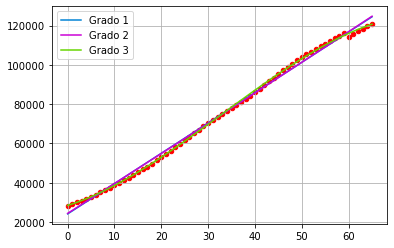

In [55]:
import numpy as np
import pandas as p

def difference(beta, X, y, n):
    beta = np.reshape(beta, [n, -1])
    y_pred = X @ beta
    return ((y - y_pred).T @ (y - y_pred))[0][0]

data = p.read_csv("Excels/population_data.csv")

years = np.array(data.get("Year").values.tolist())-1950
population = np.array(data.get("Poblacion").values.tolist())
births = np.array(data.get("Nacimientos").values.tolist())
deaths = np.array(data.get("Decesos").values.tolist())

x = np.linspace(0, years[-1], 66)
x2 = x**2
x3 = x**3

betai1 = np.random.rand(2)
betai2 = np.random.rand(3)
betai3 = np.random.rand(4)

x = np.reshape(x, [len(x), -1])
x2 = np.reshape(x2, [len(x2), -1])
x3 = np.reshape(x3, [len(x3), -1])

X = np.hstack((np.ones([len(x), 1]), x))
X2 = np.hstack((np.ones([len(x2), 1]), x, x2))
X3 = np.hstack((np.ones([len(x3), 1]), x, x2, x3))

y1 = np.reshape(population, [len(population), -1])

sol = op.minimize(difference, betai1, args=(X, y1, 2))
sol2 = op.minimize(difference, betai2, args=(X2, y1, 3))
sol3 = op.minimize(difference, betai3, args=(X3, y1, 4))

print("x = año - 1950")
print("y = Población")
print("")
print("Polinomio de grado 1:")
display(Math(sp.latex(round(sol.get("x")[0], 2))+"+"+sp.latex(round(sol.get("x")[1], 2))+"x"))
print("Polinomio de grado 2:")
display(Math(sp.latex(round(sol2.get("x")[0], 2))+"+"+sp.latex(round(sol2.get("x")[1], 2))+"x +"+sp.latex(round(sol2.get("x")[2], 3))+"x^2"))
print("Polinomio de grado 2:")
display(Math(sp.latex(round(sol3.get("x")[0], 2))+"+"+sp.latex(round(sol3.get("x")[1], 2))+"x +"+sp.latex(round(sol3.get("x")[2], 3))+"x^2 +"+sp.latex(round(sol3.get("x")[3], 5))+"x^3"))

pt.figure()
pt.scatter(x, y1, c="red", s=20)
pt.plot(x, sol.get("x")[0]+sol.get("x")[1]*x, "#0083D5", label="Grado 1")
pt.plot(x, sol2.get("x")[0]+sol2.get("x")[1]*x+sol2.get("x")[2]*x2, "#CB00D5", label="Grado 2")
pt.plot(x, sol3.get("x")[0]+sol3.get("x")[1]*x+sol3.get("x")[2]*x2+sol3.get("x")[3]*x3, "#66D500", label="Grado 3")
pt.legend()
pt.grid()



x = año - 1950
y = Nacimientos

Polinomio de grado 1:


<IPython.core.display.Math object>

Polinomio de grado 2:


<IPython.core.display.Math object>

Polinomio de grado 2:


<IPython.core.display.Math object>

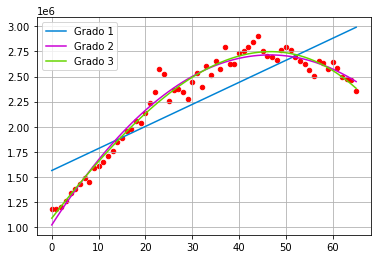

In [54]:
import numpy as np
import pandas as p

def difference(beta, X, y, n):
    beta = np.reshape(beta, [n, -1])
    y_pred = X @ beta
    return ((y - y_pred).T @ (y - y_pred))[0][0]

data = p.read_csv("Excels/population_data.csv")

years = np.array(data.get("Year").values.tolist())-1950
population = np.array(data.get("Poblacion").values.tolist())
births = np.array(data.get("Nacimientos").values.tolist())
deaths = np.array(data.get("Decesos").values.tolist())

x = np.linspace(0, years[-1], 66)
x2 = x**2
x3 = x**3

betai1 = np.random.rand(2)
betai2 = np.random.rand(3)
betai3 = np.random.rand(4)

x = np.reshape(x, [len(x), -1])
x2 = np.reshape(x2, [len(x2), -1])
x3 = np.reshape(x3, [len(x3), -1])

X = np.hstack((np.ones([len(x), 1]), x))
X2 = np.hstack((np.ones([len(x2), 1]), x, x2))
X3 = np.hstack((np.ones([len(x3), 1]), x, x2, x3))

y1 = np.reshape(births, [len(births), -1])

sol = op.minimize(difference, betai1, args=(X, y1, 2))
sol2 = op.minimize(difference, betai2, args=(X2, y1, 3))
sol3 = op.minimize(difference, betai3, args=(X3, y1, 4))

print("x = año - 1950")
print("y = Nacimientos")
print("")
print("Polinomio de grado 1:")
display(Math(sp.latex(round(sol.get("x")[0], 2))+"+"+sp.latex(round(sol.get("x")[1], 2))+"x"))
print("Polinomio de grado 2:")
display(Math(sp.latex(round(sol2.get("x")[0], 2))+"+"+sp.latex(round(sol2.get("x")[1], 2))+"x +"+sp.latex(round(sol2.get("x")[2], 3))+"x^2"))
print("Polinomio de grado 2:")
display(Math(sp.latex(round(sol3.get("x")[0], 2))+"+"+sp.latex(round(sol3.get("x")[1], 2))+"x +"+sp.latex(round(sol3.get("x")[2], 3))+"x^2 +"+sp.latex(round(sol3.get("x")[3], 5))+"x^3"))

pt.figure()
pt.scatter(x, y1, c="red", s=20)
pt.plot(x, sol.get("x")[0]+sol.get("x")[1]*x, "#0083D5", label="Grado 1")
pt.plot(x, sol2.get("x")[0]+sol2.get("x")[1]*x+sol2.get("x")[2]*x2, "#CB00D5", label="Grado 2")
pt.plot(x, sol3.get("x")[0]+sol3.get("x")[1]*x+sol3.get("x")[2]*x2+sol3.get("x")[3]*x3, "#66D500", label="Grado 3")
pt.legend()
pt.grid()